In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

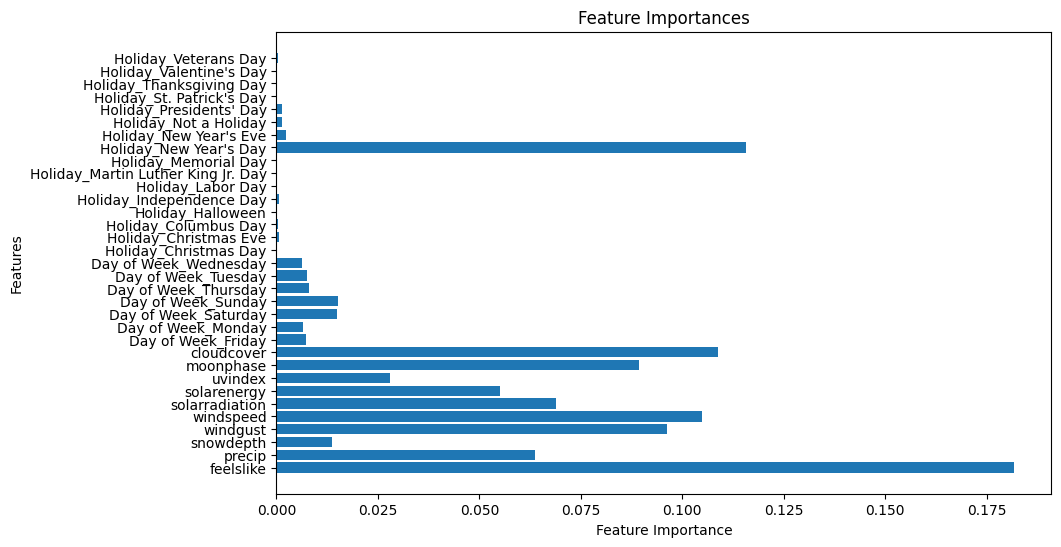

In [9]:


master_df = pd.read_csv('master.csv')
# Assuming master_df contains your data and 'Date' is a datetime column
data = master_df.copy()

# Drop unnecessary columns and missing values if needed
# data.dropna(inplace=True)  # Uncomment this line if you have missing values and want to drop them

# Split data into features (X) and target variable (y)
X = data[['Day of Week', 'feelslike', 'precip', 'snowdepth', 
          'windgust', 'windspeed', 'solarradiation', 'solarenergy', 
          'uvindex', 'moonphase', 'Holiday', 'cloudcover']]
y = data['count']

X = pd.get_dummies(X)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


# Train Random Forest model
rf = RandomForestRegressor(n_estimators=1000,min_samples_split=20,min_samples_leaf=1, max_depth=30 ,random_state=100)
rf.fit(X_train, y_train)

# Get predicted counts
y_pred = rf.predict(X_test)

# Plot feature importances
feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Grid Search
# param_grid = {
#     'n_estimators': [50,100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     # 'max_features': ['auto', 'sqrt', 'log2']
# }

# # Create the Random Forest Regressor model
# rf_model = RandomForestRegressor(random_state=42)

# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score (MSE):", -best_score)

# # Alternatively, you can use Randomized Search
# # Define the parameter distributions for Randomized Search
# param_dist = {
#     'n_estimators': [1000, 1250, 1500],
#     'max_depth': [None] + list(range(25, 101, 5)),
#     'min_samples_split': [6,8,10],
#     'min_samples_leaf': [1],
#     # 'max_features': ['auto', 'sqrt', 'log2']
# }

# # Perform Randomized Search with cross-validation
# random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
# random_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score (MSE):", -best_score)


KeyboardInterrupt: 

In [10]:
mse = mean_squared_error(y_test, y_pred)
mse

0.6278438410403709

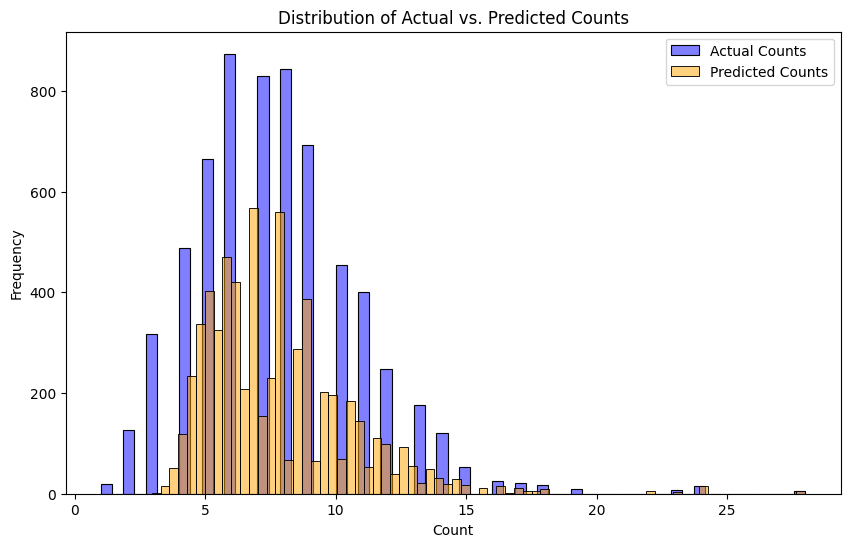

In [6]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual Counts')
sns.histplot(y_pred, color='orange', alpha=0.5, label='Predicted Counts')
plt.title('Distribution of Actual vs. Predicted Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

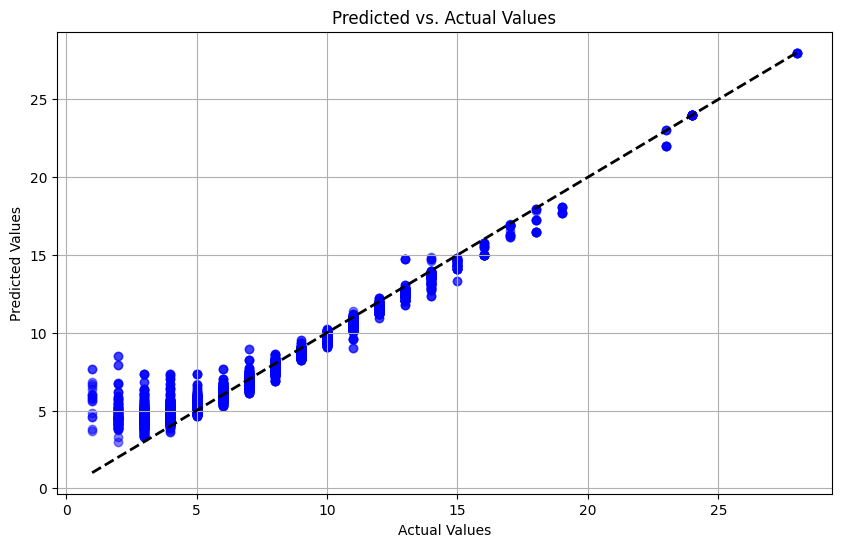

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

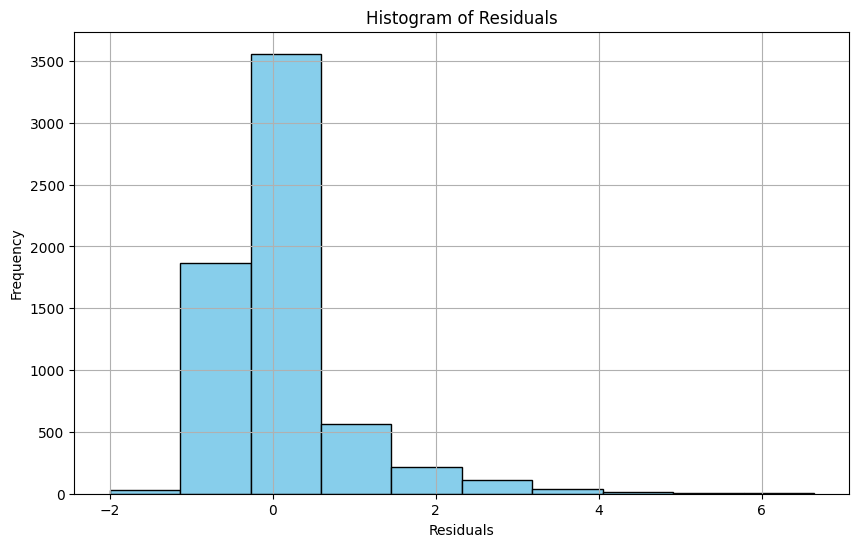

In [8]:
residuals = y_pred - y_test

plt.figure(figsize=(10, 6))
plt.hist(residuals, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import numpy as np

# Fit Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Get feature names
feature_names = X_train.columns

# Plot original coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_names)), lasso_model.coef_, marker='o', linestyle='None', color='b', label='Original Coefficients')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Original Coefficients of Lasso Regression')
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
# Gradient Boosting Model
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [12]:
X = data[['Day of Week', 'feelslike', 'precip', 'snowdepth', 
          'windgust', 'windspeed', 'solarradiation', 'solarenergy', 
          'uvindex', 'moonphase', 'Holiday', 'cloudcover']]
y = data['count']

X = pd.get_dummies(X)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [38]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.9, learning_rate = 0.2,
                max_depth = 5, alpha = 5, n_estimators = 300)
xg_reg.fit(X_train, y_train)

# Get predicted counts
y_pred = xg_reg.predict(X_test)
#'min_child_weight': 3'subsample': 0.7

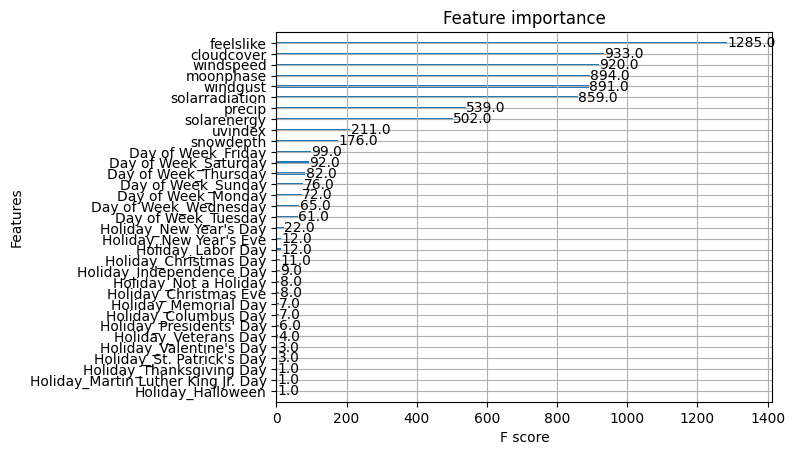

Mean Squared Error: 1.6286498808187702


In [39]:
xgb.plot_importance(xg_reg)
plt.show()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

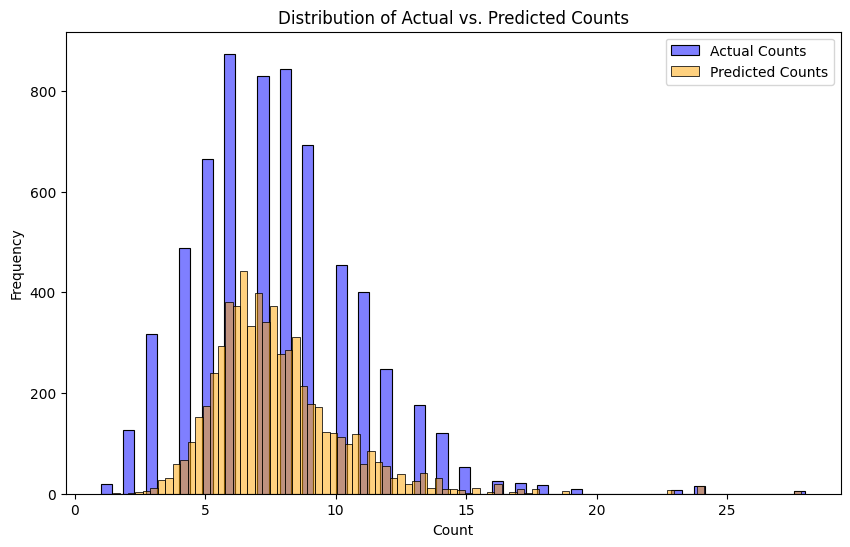

In [30]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual Counts')
sns.histplot(y_pred, color='orange', alpha=0.5, label='Predicted Counts')
plt.title('Distribution of Actual vs. Predicted Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


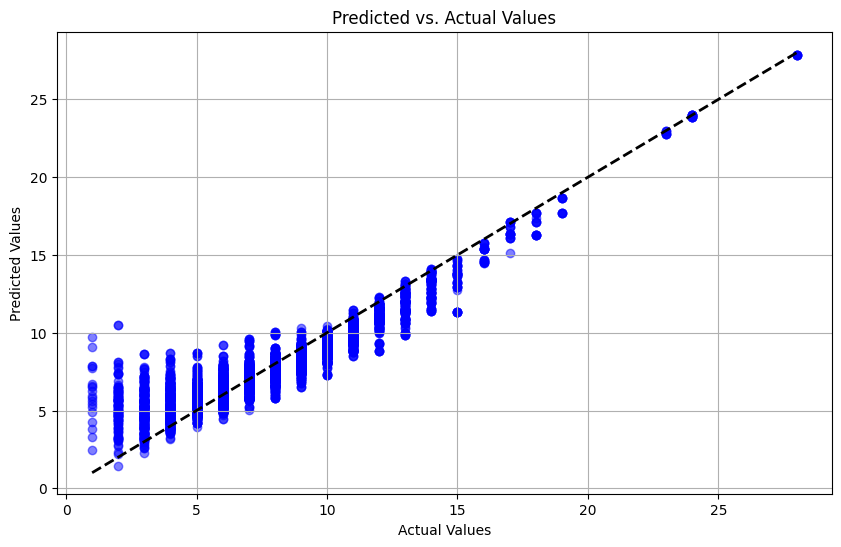

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [17]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [100, 200, 300]
}

In [20]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform Grid Search CV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Get predicted counts using the best model
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.7}
Best Score: 1.6045680423925845
